## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов

\
В этой работе запрещено использовать ансамбли моделей (лес, бустинги и т.д.)!

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

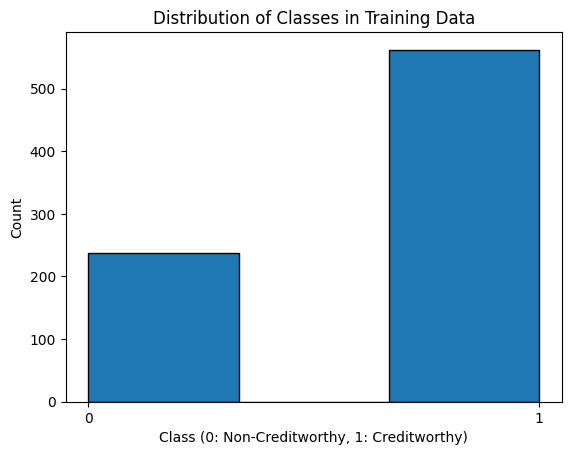

In [22]:
plt.hist(y_train, bins=3, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [16]:
# Создание модели Logistic Regression
logistic_regression_model = LogisticRegression(solver="liblinear", max_iter=100, C=7, penalty='l1')
logistic_regression_model.fit(X_train, y_train)

# Создание модели Decision Tree
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 7, min_samples_leaf= 17, max_leaf_nodes = 16)
decision_tree_model.fit(X_train, y_train)

# Создание модели K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=228, weights="distance", metric="canberra")
knn_model.fit(X_train, y_train)


KNeighborsClassifier(metric='canberra', n_neighbors=228, weights='distance')

In [33]:
# расширил итерации до 10к, пушто на 1000 вывод с ошибкой был (не понял поч так...(( )

from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=10000) 

param_grid_logistic = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_logistic = GridSearchCV(logistic_regression_model, param_grid_logistic, cv=5, scoring='accuracy')
grid_logistic.fit(X_train, y_train)
best_logistic = grid_logistic.best_estimator_

param_grid_decision_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_decision_tree = GridSearchCV(decision_tree_model, param_grid_decision_tree, cv=5, scoring='accuracy')
grid_decision_tree.fit(X_train, y_train)
best_decision_tree = grid_decision_tree.best_estimator_

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

y_prob_logistic = best_logistic.predict_proba(X_test)[:, 1]
y_prob_decision_tree = best_decision_tree.predict_proba(X_test)[:, 1]
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]

y_pred_logistic = best_logistic.predict(X_test)
y_pred_decision_tree = best_decision_tree.predict(X_test)
y_pred_knn = best_knn.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
precision_knn = precision_score(y_test, y_pred_knn)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
recall_knn = recall_score(y_test, y_pred_knn)

print(f'Accuracy of Optimized Logistic Regression: {accuracy_logistic}')
print(f'Accuracy of Optimized Decision Tree: {accuracy_decision_tree}')
print(f'Accuracy of Optimized K-Nearest Neighbors: {accuracy_knn}')

print(f'ROC AUC of Optimized Logistic Regression: {roc_auc_logistic}')
print(f'ROC AUC of Optimized Decision Tree: {roc_auc_decision_tree}')
print(f'ROC AUC of Optimized K-Nearest Neighbors: {roc_auc_knn}')

print(f'Precision of Optimized Logistic Regression: {precision_logistic}')
print(f'Precision of Optimized Decision Tree: {precision_decision_tree}')
print(f'Precision of Optimized K-Nearest Neighbors: {precision_knn}')

print(f'Recall of Optimized Logistic Regression: {recall_logistic}')
print(f'Recall of Optimized Decision Tree: {recall_decision_tree}')
print(f'Recall of Optimized K-Nearest Neighbors: {recall_knn}')


Accuracy of Optimized Logistic Regression: 0.735
Accuracy of Optimized Decision Tree: 0.785
Accuracy of Optimized K-Nearest Neighbors: 0.74
ROC AUC of Optimized Logistic Regression: 0.7903225806451613
ROC AUC of Optimized Decision Tree: 0.8177302477793362
ROC AUC of Optimized K-Nearest Neighbors: 0.7308321645628799
Precision of Optimized Logistic Regression: 0.7575757575757576
Precision of Optimized Decision Tree: 0.7950310559006211
Precision of Optimized K-Nearest Neighbors: 0.7721518987341772
Recall of Optimized Logistic Regression: 0.9057971014492754
Recall of Optimized Decision Tree: 0.927536231884058
Recall of Optimized K-Nearest Neighbors: 0.8840579710144928


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели